# Text Analytics for Beginners using NLTK

NLTK is a powerful Python package that provides a set of diverse natural languages algorithms.  It is free, opensource, easy to use, large community, and well documented. NLTK consists of most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. NLTK helps the computer to analysis, preprocess, and understand the written text.

In [4]:
!pip install nltk

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
#Loading NLTK
import nltk

### Tokenization

Tokinzation is a first step in text analytics. The process of breaking down text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentance or paragraph. 

#### Sentence Tokenization

Sentence tokeizer breaks text paragraph into sentences.

In [6]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. 
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


Here, Given text is tokenized into sentences.

#### Word Tokenization

Word tokenizer breaks text paragraph into words.

In [30]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


#### Frequency Distribution

In [31]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [32]:
fdist.most_common(2)

[('is', 3), (',', 2)]

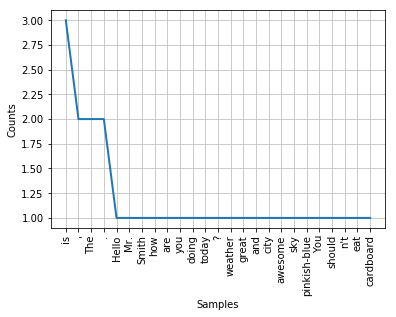

In [37]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Stopwords

Stopwards considered as noise in text. Text may contains stop words such as is, am , are,  this, a, an, the etc.

In NLTK for removing stopwords, you need to create list of stopwords and filter out your list of tokens from these words.

In [11]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'their', 'then', 'not', 'ma', 'here', 'other', 'won', 'up', 'weren', 'being', 'we', 'those', 'an', 'them', 'which', 'him', 'so', 'yourselves', 'what', 'own', 'has', 'should', 'above', 'in', 'myself', 'against', 'that', 'before', 't', 'just', 'into', 'about', 'most', 'd', 'where', 'our', 'or', 'such', 'ours', 'of', 'doesn', 'further', 'needn', 'now', 'some', 'too', 'hasn', 'more', 'the', 'yours', 'her', 'below', 'same', 'how', 'very', 'is', 'did', 'you', 'his', 'when', 'few', 'does', 'down', 'yourself', 'i', 'do', 'both', 'shan', 'have', 'itself', 'shouldn', 'through', 'themselves', 'o', 'didn', 've', 'm', 'off', 'out', 'but', 'and', 'doing', 'any', 'nor', 'over', 'had', 'because', 'himself', 'theirs', 'me', 'by', 'she', 'whom', 'hers', 're', 'hadn', 'who', 'he', 'my', 'if', 'will', 'are', 'why', 'from', 'am', 'with', 'been', 'its', 'ourselves', 'ain', 'couldn', 'a', 'aren', 'under', 'll', 'on', 'y', 'can', 'they', 'than', 'after', 'wouldn', 'each', 'once', 'mightn', 'for', 'this', 'th

#### Removing Stopwords

In [12]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']


### Lexicon Normalization

Lexicon normalization consderedas another type of noise in text. for example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

#### Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. for example, connection, connected, connecting word reduce to a common word "connect".

In [13]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)    

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?']


#### Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with use of vocabulary and morphological analysis. lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [14]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "flying" 
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


### POS Tagging

The main target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word. 

In [15]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [16]:
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [17]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

POS tagged: Albert/NNP Einstein/NNP was/VBD born/VBN in/IN Ulm/NNP ,/, Germany/NNP in/IN 1879/CD ./.

## Sentiment Analysis

## Performing Sentiment Analysis using Text Classification

In [19]:
# Import pands
import pandas as pd

#### Loading Data

Till now, you have learned data preprocssig using NLTK. Now, you will learn Text Classification. you will perform Multi-Nomial Naive Bayes Classification using scikit-learn. 

In the model the building part, you can use the "Sentiment Analysis of Movie, Reviews" dataset availale on Kaggle. The dataset is a tab-separated file. Dataset has four columns PhraseId,SentenceId, Phrase, and Sentiment. 

This data has 5 sentiment labels:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

Here, you can build a model to classify the type of cultivar. The dataset is available on kaggle, you can download it from following link: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data 

In [20]:
data=pd.read_csv('train.tsv', sep='\t')

In [21]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [23]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

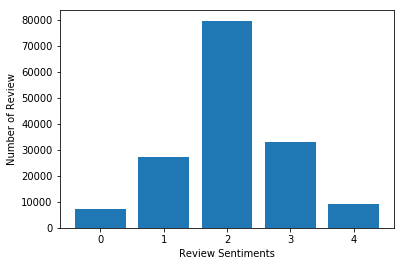

In [24]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

#### Feature Generation using Bag of Words

In Text Classification Problem, we have a set of texts and their respective labels. but we directly can't use text for our model. you need to convert these text into some numbers or vectors of numbers.  

Bag-of-words model(BoW ) is the simplest way of extracting features from the text.  BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document. 

Example: There are three documents:

Doc 1: I love dogs.
Doc 2: I hate dogs and knitting.
Doc 3: Knitting is my hobby and passion. 

Now, you can create a matrix of document and words by counting the occurrence of words in given document. This matrix is known as Document-Term Matrix(DTM).

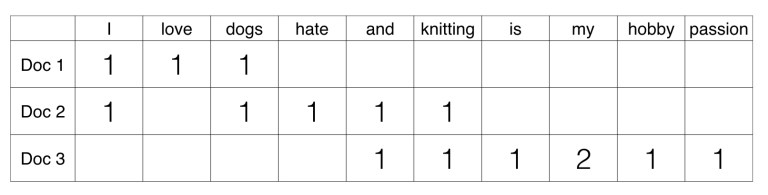

This matrix is using a single word. It can be a combination of two or more words, which is called bigram or trigram model and the general approach is called the n-gram model.

You can generate document term matrix by using scikit-learn's CountVectorizer. 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+') 
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

#### Split train and test set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

#### Model Building and Evaluation

Let's build Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [31]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.604916912299


Well, you got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.

#### Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model. 

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.  

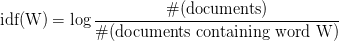

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix.  It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

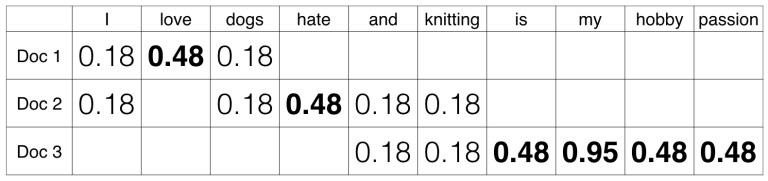

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

#### Split train and test set (TF-IDF)

Let's split dataset by using function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

#### Model Building and Evaluation  (TF-IDF)

Let's build Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.586526549618


Well, you got a classification rate of 58.65% using TF-IDF features, which is not considered as good accuracy. We need to improve accuracy using some other preprocessing or feature engineering. Let's suggest in comment box some approach for accuracy improvement.